# **SVAMITVA AI Model for Drone Analysis**  

## **Project Overview**  
This project implements an **AI-driven solution** for analyzing **drone orthophotos** to extract rural land features with high accuracy. By leveraging **YOLOv8 for semantic segmentation**, the model identifies and classifies land features to assist in **property demarcation** and **GIS data integration**.

## **Key Achievements**  
✅ Achieved **90% accuracy** in feature extraction from drone imagery.  
✅ Implemented **YOLOv8 segmentation** for precise identification of rural land features.  
✅ Integrated **GIS data** to enhance property boundary mapping and land classification.  

## **Semantic Segmentation in Drone Analysis**  
Semantic segmentation is a computer vision technique where each pixel in an image is classified into a predefined category. In this project, it allows **detailed land mapping** by distinguishing between features such as **buildings, roads, water bodies, and vegetation** in aerial images.

## **Why YOLOv8?**  
YOLOv8 (You Only Look Once v8) is an advanced deep learning model known for its **speed, accuracy, and real-time processing capabilities**. It excels in:  
- **Instance Segmentation**: Identifies multiple objects in a single pass.  
- **Efficiency**: Optimized for deployment on edge devices like drones.  
- **Robustness**: Performs well in varying environmental conditions and image qualities.  

This model contributes to **precision mapping**, aiding **land governance** and **property rights management** in rural areas. 🚀  


#Label
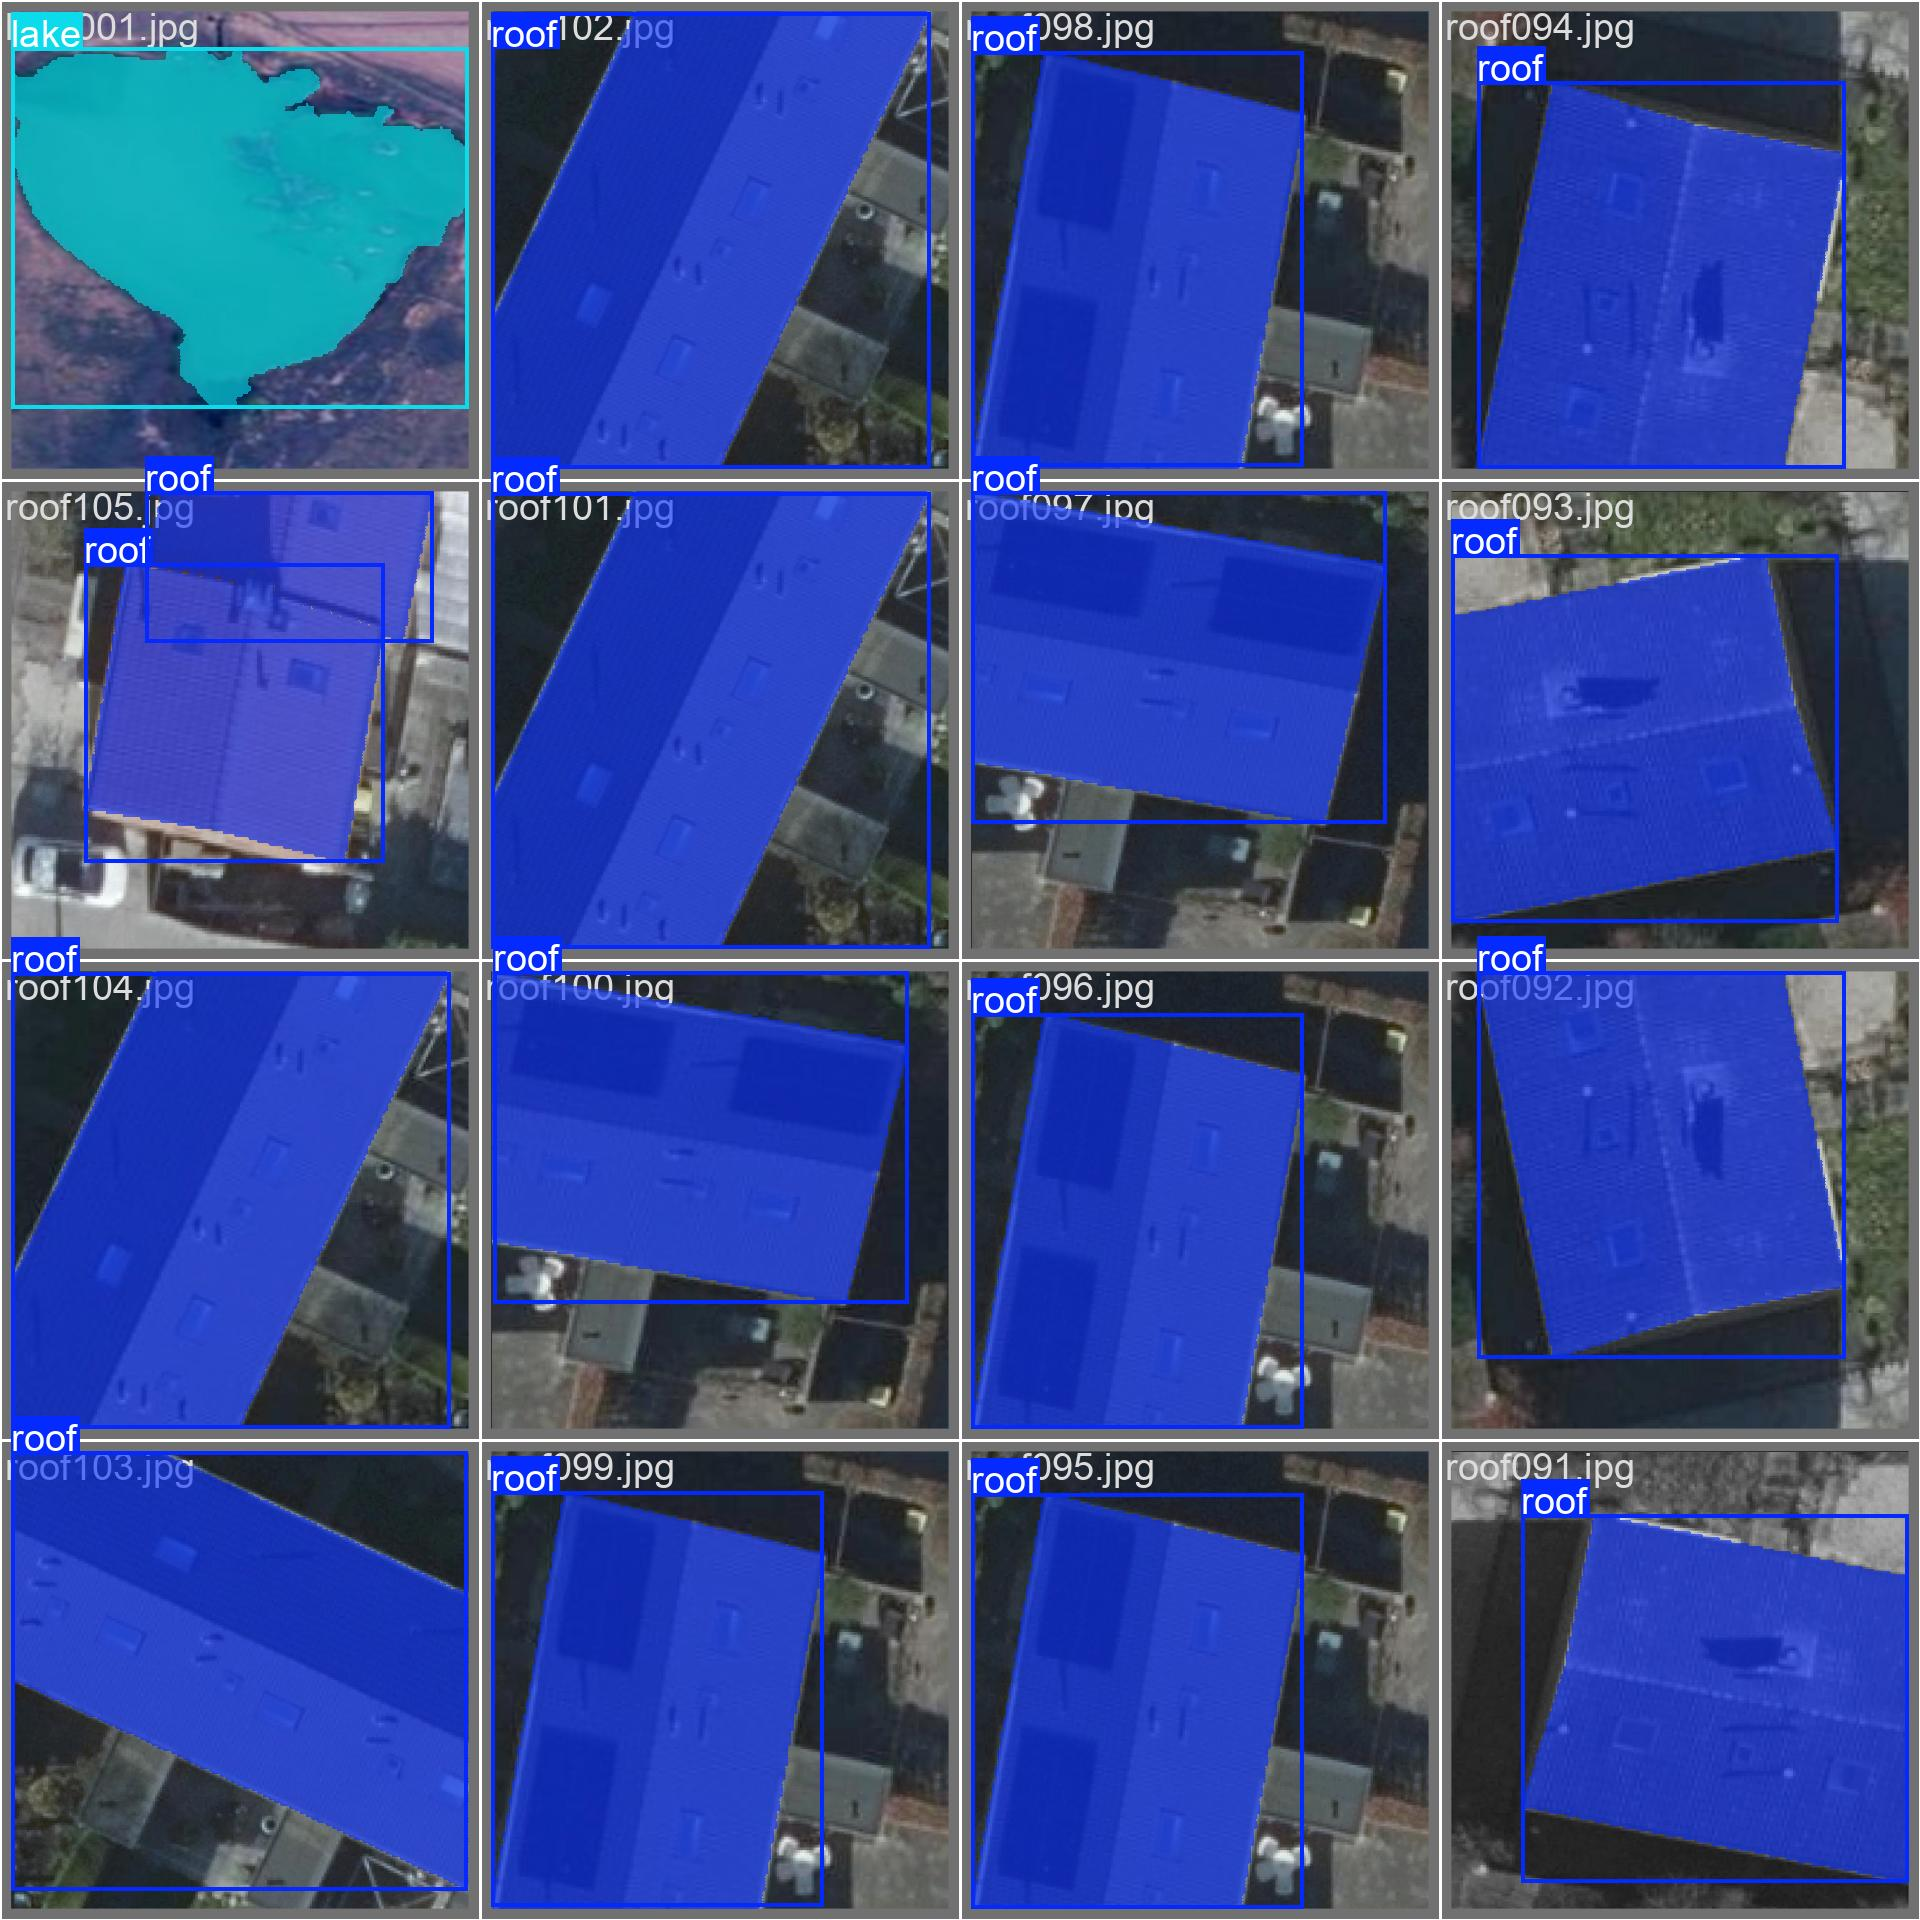

#Prediction
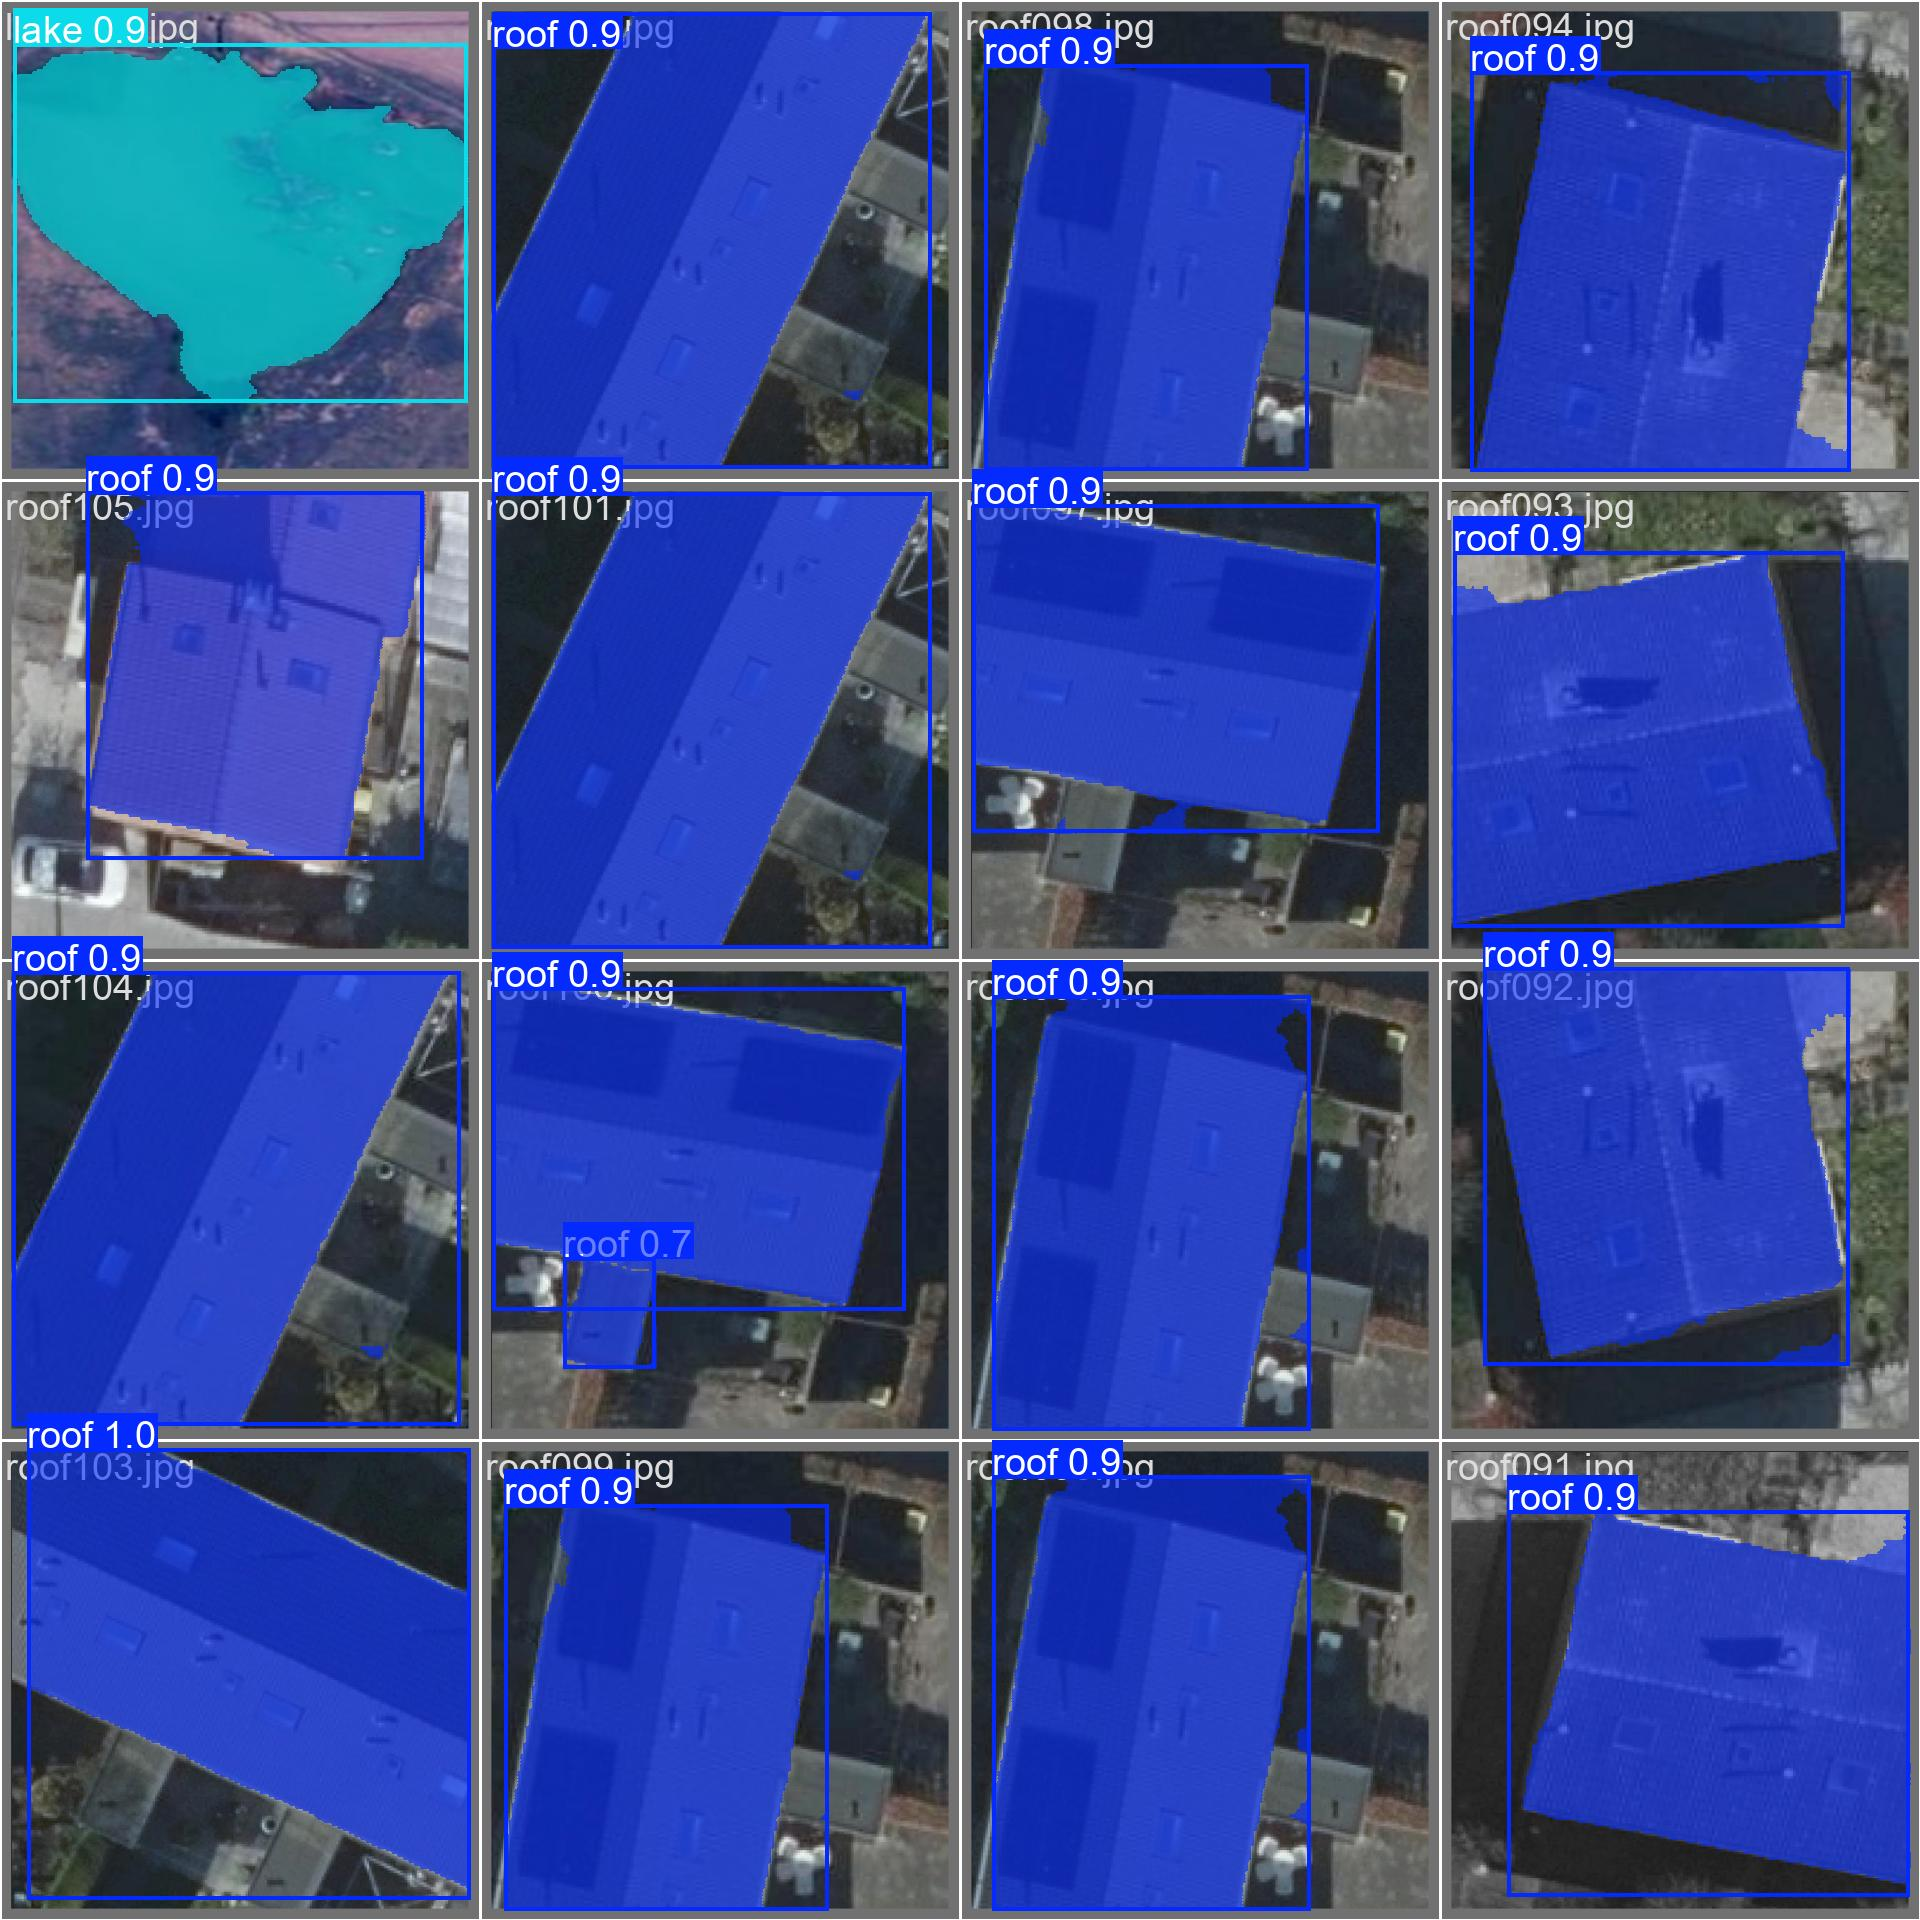

In [ ]:
#Importing libraries
from ultralytics import YOLO
import cv2
import torch


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## YOLOv8 Model Training and Performance Summary

This notebook trains a **YOLOv8 segmentation model** and evaluates its performance.

### **Workflow:**
1. **Load the YOLOv8 Model**  
   - Uses `yolov8m-seg.pt` (medium-sized segmentation model).  
   - Other variants like `yolov8s-seg.pt` (small) or `yolov8l-seg.pt` (large) can be used.

2. **Train the Model**  
   - Uses a dataset defined in `data_p.yaml`.  
   - Runs for `75` epochs with an image size of `640x640`.

3. **Evaluate Training Performance**  
   - The `display_metrics_summary` function extracts key metrics:
     - **Precision, Recall, mAP@50, and mAP@50-95**
     - **Fitness score** (overall model performance).
     - **Speed metrics** (preprocessing, inference, and post-processing time).
     - **Loss value** to monitor model optimization.

This ensures proper validation of training results before testing the model.


In [ ]:
from ultralytics import YOLO

#Loading model
model = YOLO("yolov8m-seg.pt")

#Training model
results = model.train(data="/content/drive/MyDrive/SIH/DS_rl/data_p.yaml", epochs=75, imgsz=640)


# Function to display metrics summary
def display_metrics_summary(results):
    metrics = results.results_dict
    speed = results.speed

    print("\n### Model Training Summary ###\n")
    print(f"Precision (B): {metrics['metrics/precision(B)']:.4f}")
    print(f"Recall (B): {metrics['metrics/recall(B)']:.4f}")
    print(f"mAP@50 (B): {metrics['metrics/mAP50(B)']:.4f}")
    print(f"mAP@50-95 (B): {metrics['metrics/mAP50-95(B)']:.4f}")
    print(f"Fitness Score: {results.fitness:.4f}")

    print("\n### Speed Metrics ###\n")
    print(f"Preprocessing Time: {speed['preprocess']:.2f} ms per image")
    print(f"Inference Time: {speed['inference']:.2f} ms per image")
    print(f"Post-processing Time: {speed['postprocess']:.2f} ms per image")
    print(f"Loss: {speed['loss']:.4f}")

display_metrics_summary(results)

Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/drive/MyDrive/SIH/DS_rl/data_p.yaml, epochs=75, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

train: Scanning /content/drive/MyDrive/SIH/DS_rl/train/labels.cache... 2301 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2301/2301 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/SIH/DS_rl/valid/labels.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/75      10.2G       1.59      2.953      1.802       1.63        109        640: 100%|██████████| 144/144 [02:59<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.42it/s]


                   all        574       1102      0.375      0.501      0.388      0.203      0.369      0.436       0.33      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/75      11.7G      1.695      2.907        1.6      1.689        129        640: 100%|██████████| 144/144 [02:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:13<00:00,  1.37it/s]


                   all        574       1102      0.392      0.461      0.334      0.136      0.376      0.433      0.299      0.113

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/75      11.7G      1.659      2.852       1.56      1.701        148        640: 100%|██████████| 144/144 [02:03<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.44it/s]

                   all        574       1102      0.495      0.527      0.522      0.288      0.422      0.437      0.388      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/75      11.7G      1.618      2.776      1.469      1.656        154        640: 100%|██████████| 144/144 [02:00<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.39it/s]

                   all        574       1102      0.543      0.512      0.491       0.24      0.519      0.465      0.436      0.211



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/75      11.7G      1.547      2.689      1.373      1.608        146        640: 100%|██████████| 144/144 [02:01<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.39it/s]

                   all        574       1102       0.49      0.604       0.58      0.335      0.447      0.526      0.493      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/75      11.7G      1.498      2.614      1.307      1.579        239        640: 100%|██████████| 144/144 [02:00<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.47it/s]

                   all        574       1102      0.697      0.637      0.693      0.403      0.681      0.623      0.642      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/75      11.7G      1.439      2.533      1.239      1.533        149        640: 100%|██████████| 144/144 [02:01<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.42it/s]

                   all        574       1102      0.668      0.635      0.684      0.437      0.665      0.606      0.639       0.36



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/75      11.7G       1.43      2.461      1.198       1.52        172        640: 100%|██████████| 144/144 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.44it/s]

                   all        574       1102      0.761      0.705      0.773      0.482      0.762      0.668      0.723      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/75      11.7G      1.405      2.423      1.183      1.505         96        640: 100%|██████████| 144/144 [02:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.44it/s]

                   all        574       1102      0.777      0.718      0.785      0.483       0.75      0.693       0.74      0.415



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/75      11.7G      1.364      2.345      1.128      1.475         97        640: 100%|██████████| 144/144 [02:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.42it/s]

                   all        574       1102      0.721      0.725      0.769      0.491      0.678      0.676      0.694      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/75      11.7G      1.349      2.316      1.087      1.456        106        640: 100%|██████████| 144/144 [02:00<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.44it/s]

                   all        574       1102      0.702      0.561      0.589      0.356      0.672      0.554       0.54      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/75      11.7G       1.36      2.316      1.109      1.461        162        640: 100%|██████████| 144/144 [02:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.42it/s]

                   all        574       1102      0.763      0.693      0.769      0.516      0.746      0.648      0.715      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/75      11.7G      1.266      2.178      1.024      1.419        207        640: 100%|██████████| 144/144 [01:59<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.48it/s]

                   all        574       1102      0.816      0.705      0.795      0.534      0.834      0.683      0.753      0.459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/75      11.7G      1.276      2.236          1      1.413        104        640: 100%|██████████| 144/144 [02:00<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.41it/s]

                   all        574       1102      0.826      0.726      0.816      0.502      0.792      0.663      0.711      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/75      11.7G      1.249      2.129      1.019      1.391         97        640: 100%|██████████| 144/144 [02:01<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.45it/s]

                   all        574       1102      0.853      0.716      0.823      0.547      0.834      0.704      0.786      0.473



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/75      11.7G      1.256       2.13     0.9705      1.397        145        640: 100%|██████████| 144/144 [01:59<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.45it/s]

                   all        574       1102      0.826      0.759      0.831      0.548      0.806      0.735      0.787       0.47



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/75      11.7G      1.236      2.102     0.9412       1.37         82        640: 100%|██████████| 144/144 [02:00<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.46it/s]

                   all        574       1102      0.835      0.717      0.805      0.538      0.827      0.703      0.771      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/75      11.7G      1.213      2.047     0.9352      1.369         33        640: 100%|██████████| 144/144 [02:00<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.46it/s]

                   all        574       1102       0.83      0.732      0.805      0.544      0.844      0.697      0.759      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/75      11.7G      1.194      2.025     0.8965      1.335        132        640: 100%|██████████| 144/144 [01:58<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.52it/s]

                   all        574       1102      0.815      0.733      0.809      0.528      0.817      0.719      0.781      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/75      11.7G      1.225       2.09     0.9347      1.345        136        640: 100%|██████████| 144/144 [02:01<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.53it/s]

                   all        574       1102      0.835       0.76       0.83       0.54      0.803      0.748      0.789      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/75      11.7G      1.162      1.974     0.8962      1.336         64        640: 100%|██████████| 144/144 [01:57<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.47it/s]

                   all        574       1102      0.835       0.72      0.807      0.556      0.812      0.692      0.757      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/75      11.7G      1.166      1.969     0.8611      1.313        213        640: 100%|██████████| 144/144 [01:57<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.51it/s]

                   all        574       1102       0.87      0.743      0.834      0.556       0.86      0.731      0.802      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/75      11.7G      1.142      1.944      0.861      1.307         75        640: 100%|██████████| 144/144 [01:58<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.48it/s]

                   all        574       1102      0.847      0.747      0.849       0.57      0.828      0.733      0.818      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/75      11.7G      1.143      1.945      0.837       1.31        164        640: 100%|██████████| 144/144 [01:59<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.48it/s]

                   all        574       1102      0.864      0.729      0.815      0.563      0.864      0.715      0.781      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/75      11.7G      1.104      1.873     0.8277      1.292         48        640: 100%|██████████| 144/144 [01:59<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.57it/s]

                   all        574       1102      0.826      0.749      0.807      0.563      0.793       0.71      0.734      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/75      11.7G       1.12      1.888     0.8274      1.289         85        640: 100%|██████████| 144/144 [01:58<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.46it/s]

                   all        574       1102      0.867      0.735      0.833      0.568       0.86      0.714      0.793       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/75      11.7G        1.1      1.835     0.7865      1.274         90        640: 100%|██████████| 144/144 [01:59<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.53it/s]

                   all        574       1102      0.874      0.776      0.851      0.594      0.853      0.771      0.821      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/75      11.7G      1.096      1.857     0.7849      1.272         80        640: 100%|██████████| 144/144 [01:59<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.51it/s]

                   all        574       1102      0.875      0.762      0.837      0.571      0.866      0.742      0.798      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/75      11.7G      1.088      1.824     0.7752       1.27         95        640: 100%|██████████| 144/144 [01:58<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.48it/s]

                   all        574       1102      0.844      0.785      0.868      0.595       0.84      0.763      0.835      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/75      11.7G      1.058      1.799     0.7555      1.254         98        640: 100%|██████████| 144/144 [01:58<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.56it/s]

                   all        574       1102      0.872      0.736      0.842      0.594      0.867      0.707      0.801      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/75      11.7G      1.061      1.791      0.748      1.249         72        640: 100%|██████████| 144/144 [01:57<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.46it/s]

                   all        574       1102      0.885      0.752      0.841      0.596      0.869      0.726      0.811      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/75      11.7G      1.055      1.771     0.7303      1.241        185        640: 100%|██████████| 144/144 [01:58<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.54it/s]

                   all        574       1102      0.864      0.756      0.845      0.577      0.858       0.75      0.823      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/75      11.7G      1.025      1.724     0.7113      1.221        100        640: 100%|██████████| 144/144 [01:57<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.51it/s]

                   all        574       1102      0.883      0.758      0.849      0.592      0.877      0.753      0.824       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/75      11.7G      1.014      1.748     0.7149       1.22        121        640: 100%|██████████| 144/144 [01:59<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.49it/s]

                   all        574       1102      0.866      0.779      0.869      0.623      0.847       0.76      0.837      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/75      11.7G      1.012      1.724     0.7173      1.218         88        640: 100%|██████████| 144/144 [01:58<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.48it/s]

                   all        574       1102      0.873      0.732      0.823       0.58      0.842      0.735       0.79      0.504



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/75      11.7G       1.02      1.694     0.7021      1.217        166        640: 100%|██████████| 144/144 [01:58<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.48it/s]

                   all        574       1102      0.858      0.765       0.84      0.613       0.85      0.753      0.818      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/75      11.7G     0.9802      1.652     0.6783      1.196        146        640: 100%|██████████| 144/144 [01:59<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.45it/s]

                   all        574       1102      0.839      0.764      0.848      0.601      0.804      0.734      0.796      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/75      11.7G     0.9822      1.652     0.6726      1.196        104        640: 100%|██████████| 144/144 [01:59<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.53it/s]

                   all        574       1102      0.813      0.821      0.859      0.608      0.841      0.768      0.826      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/75      11.7G     0.9814      1.655     0.6749      1.199        121        640: 100%|██████████| 144/144 [01:57<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.50it/s]

                   all        574       1102      0.888      0.787      0.875      0.624      0.867      0.793      0.854      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/75      11.7G     0.9556      1.605     0.6419      1.178        134        640: 100%|██████████| 144/144 [01:58<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.54it/s]

                   all        574       1102      0.836       0.78      0.863      0.621      0.824      0.782      0.835      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/75      11.7G     0.9361      1.588     0.6264       1.17         71        640: 100%|██████████| 144/144 [01:57<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.48it/s]

                   all        574       1102       0.87      0.782      0.847      0.595      0.851      0.757      0.806      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/75      11.7G     0.9661      1.609     0.6416      1.179         96        640: 100%|██████████| 144/144 [01:58<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.48it/s]

                   all        574       1102      0.842      0.805      0.872      0.625      0.865      0.773      0.842      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/75      11.7G     0.9407      1.585     0.6359      1.168         98        640: 100%|██████████| 144/144 [01:58<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.48it/s]

                   all        574       1102      0.867      0.778      0.874      0.615      0.871      0.753      0.844      0.549



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/75      11.7G     0.9173      1.554      0.619      1.157         88        640: 100%|██████████| 144/144 [01:58<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.48it/s]

                   all        574       1102      0.878      0.774      0.867      0.631       0.87      0.761      0.839      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/75      11.7G     0.9138       1.55      0.605       1.14         72        640: 100%|██████████| 144/144 [01:58<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.47it/s]

                   all        574       1102      0.873      0.772      0.869      0.611      0.888      0.747       0.84       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/75      11.7G     0.9135      1.552      0.618       1.15         76        640: 100%|██████████| 144/144 [01:58<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.58it/s]

                   all        574       1102      0.878      0.805      0.877      0.627      0.858      0.786      0.846      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/75      11.7G     0.9067      1.515     0.6036      1.132         84        640: 100%|██████████| 144/144 [01:59<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.47it/s]

                   all        574       1102      0.854      0.835      0.883      0.642      0.834      0.813      0.846      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/75      11.7G      0.897      1.503     0.5983      1.146        132        640: 100%|██████████| 144/144 [01:58<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.50it/s]

                   all        574       1102      0.878      0.792      0.861      0.632      0.871      0.768      0.837      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/75      11.7G     0.8829      1.489     0.5815      1.138         92        640: 100%|██████████| 144/144 [01:57<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.49it/s]

                   all        574       1102      0.903      0.784      0.864      0.636      0.888      0.774      0.838       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/75      11.7G     0.8596      1.461     0.5688      1.125        102        640: 100%|██████████| 144/144 [01:58<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.52it/s]

                   all        574       1102      0.898      0.769      0.865       0.63       0.89      0.769      0.849       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      51/75      11.7G     0.8654      1.452     0.5608      1.115        143        640: 100%|██████████| 144/144 [01:59<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.55it/s]

                   all        574       1102      0.891      0.804       0.88      0.643      0.888      0.776      0.849      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      52/75      11.7G     0.8516      1.438     0.5612      1.116        123        640: 100%|██████████| 144/144 [01:57<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.43it/s]

                   all        574       1102      0.875      0.797      0.858      0.635      0.892      0.756       0.83      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      53/75      11.7G     0.8506       1.42     0.5488      1.097        110        640: 100%|██████████| 144/144 [01:59<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.50it/s]

                   all        574       1102      0.877      0.785      0.853      0.614      0.871      0.768       0.83      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      54/75      11.7G     0.8436      1.422     0.5534      1.105         50        640: 100%|██████████| 144/144 [01:58<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.48it/s]

                   all        574       1102      0.878      0.786      0.873      0.642      0.868      0.771      0.849      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      55/75      11.7G     0.8411      1.413      0.545        1.1        103        640: 100%|██████████| 144/144 [01:58<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.48it/s]

                   all        574       1102      0.893      0.796      0.871      0.633      0.863      0.783      0.832      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      56/75      11.7G     0.8291      1.375     0.5339      1.092         62        640: 100%|██████████| 144/144 [01:58<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.56it/s]

                   all        574       1102      0.864      0.824      0.876       0.65      0.848      0.813      0.849      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      57/75      11.7G     0.8178       1.37     0.5345      1.088        113        640: 100%|██████████| 144/144 [01:57<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.49it/s]

                   all        574       1102      0.861      0.815      0.867      0.632      0.837      0.794      0.834      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      58/75      11.7G     0.8077      1.355     0.5287      1.083        102        640: 100%|██████████| 144/144 [01:58<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.50it/s]

                   all        574       1102      0.872      0.828      0.888      0.648      0.875      0.799      0.861      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      59/75      11.7G     0.7954      1.317     0.5121      1.081        253        640: 100%|██████████| 144/144 [01:58<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.49it/s]

                   all        574       1102      0.881      0.826      0.883      0.657      0.855      0.807      0.859      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      60/75      11.7G      0.816      1.361     0.5209      1.081        126        640: 100%|██████████| 144/144 [01:58<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.52it/s]

                   all        574       1102      0.871       0.82      0.884      0.661      0.879      0.791      0.853      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      61/75      11.7G      0.809      1.344     0.5152      1.079        101        640: 100%|██████████| 144/144 [01:58<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.45it/s]

                   all        574       1102      0.878      0.818      0.885      0.656      0.865      0.801       0.86      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      62/75      11.7G     0.7929      1.338     0.5066      1.068         79        640: 100%|██████████| 144/144 [01:58<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.49it/s]

                   all        574       1102       0.89      0.811      0.871      0.639      0.889      0.798      0.846       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      63/75      11.7G     0.7924      1.318     0.5004      1.066        298        640: 100%|██████████| 144/144 [01:57<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.48it/s]

                   all        574       1102      0.846      0.836      0.879      0.652      0.831      0.821      0.846       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      64/75      11.7G     0.7579      1.275      0.486      1.052         87        640: 100%|██████████| 144/144 [01:59<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.46it/s]

                   all        574       1102      0.861      0.833      0.885      0.669      0.847      0.821      0.858      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      65/75      11.7G     0.7569      1.276     0.4834      1.051         75        640: 100%|██████████| 144/144 [01:58<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.58it/s]

                   all        574       1102      0.897       0.82      0.875      0.656       0.88      0.813      0.858      0.582


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      66/75      11.7G      0.703      1.266     0.4446      1.052         39        640: 100%|██████████| 144/144 [01:50<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.55it/s]

                   all        574       1102      0.911      0.786      0.889      0.653      0.887      0.783      0.857      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      67/75      11.7G      0.695      1.223     0.4177      1.043         59        640: 100%|██████████| 144/144 [01:47<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.51it/s]

                   all        574       1102      0.865      0.831      0.887      0.664      0.845      0.823       0.86      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      68/75      11.7G     0.6782      1.183     0.4102      1.039         66        640: 100%|██████████| 144/144 [01:47<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.53it/s]

                   all        574       1102      0.886      0.825      0.887      0.662      0.875      0.812      0.865      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      69/75      11.7G     0.6551      1.152     0.3923      1.026        162        640: 100%|██████████| 144/144 [01:48<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.54it/s]

                   all        574       1102      0.884       0.82       0.89      0.675      0.872      0.805      0.867       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      70/75      11.7G      0.646      1.143     0.3852      1.014        125        640: 100%|██████████| 144/144 [01:48<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.51it/s]

                   all        574       1102      0.896      0.832      0.892       0.67      0.903      0.808      0.872      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      71/75      11.7G     0.6517       1.14     0.3836      1.014        140        640: 100%|██████████| 144/144 [01:47<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.54it/s]

                   all        574       1102      0.894      0.833      0.896       0.68      0.897      0.805      0.876      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      72/75      11.7G     0.6369      1.125     0.3798      1.015         92        640: 100%|██████████| 144/144 [01:47<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.57it/s]

                   all        574       1102      0.898       0.83      0.896      0.679       0.88      0.815      0.871      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      73/75      11.7G     0.6204      1.095     0.3698      1.002         57        640: 100%|██████████| 144/144 [01:48<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.54it/s]

                   all        574       1102      0.895      0.843      0.897      0.684      0.876      0.825      0.871      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      74/75      11.7G     0.6185      1.105     0.3658     0.9975        100        640: 100%|██████████| 144/144 [01:48<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.50it/s]

                   all        574       1102      0.894      0.832      0.894      0.681      0.884      0.814      0.875      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      75/75      11.7G     0.6142      1.094     0.3661     0.9931        107        640: 100%|██████████| 144/144 [01:47<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.52it/s]

                   all        574       1102      0.899      0.834      0.902      0.683      0.879      0.818      0.876      0.596



75 epochs completed in 2.854 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 54.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-seg summary (fused): 105 layers, 27,223,542 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:15<00:00,  1.17it/s]


                   all        574       1102      0.895      0.843      0.896      0.685      0.877      0.826      0.871      0.601
                  roof        287        813      0.875      0.756      0.833       0.58      0.856      0.738      0.809      0.517
                  lake        287        289      0.915      0.931      0.959      0.789      0.898      0.913      0.933      0.685
Speed: 0.3ms preprocess, 12.6ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/segment/train

### Model Training Summary ###

Precision (B): 0.8949
Recall (B): 0.8433
mAP@50 (B): 0.8964
mAP@50-95 (B): 0.6846
Fitness Score: 1.3337

### Speed Metrics ###

Preprocessing Time: 0.29 ms per image
Inference Time: 12.58 ms per image
Post-processing Time: 2.93 ms per image
Loss: 0.0216


#Testing model


image 1/1 /content/drive/MyDrive/SIH/valid/images/kel-jalantanjung_png.rf.2a3a87f466491feb5bad0469c58db4dc.jpg: 640x640 55 roofs, 46.2ms
Speed: 4.0ms preprocess, 46.2ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)


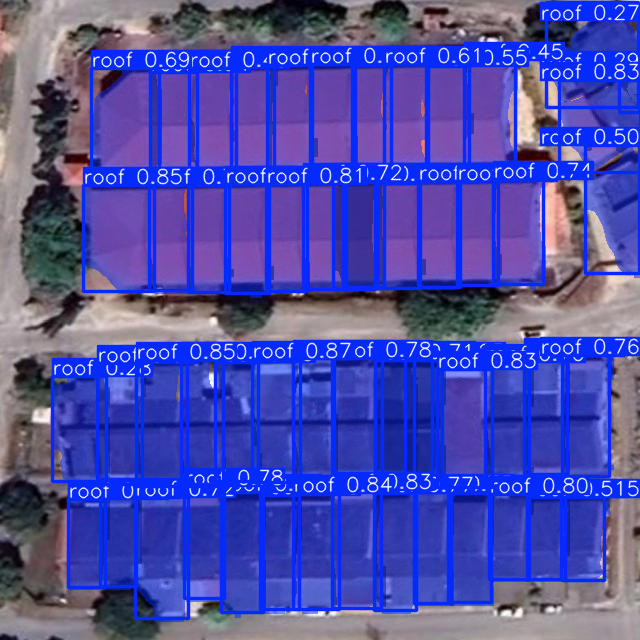

In [ ]:
# Perform inference
results = model('/content/drive/MyDrive/SIH/valid/images/kel-jalantanjung_png.rf.2a3a87f466491feb5bad0469c58db4dc.jpg')

result = results[0]

# Display the image with predictions
result.show()
